# Homework 4: Due Sunday 11/27 11:30pm

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion materials are also allowed.

# Exercises
## Exercise 1 - Agglomerative Clustering (40 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (20 points)

 - Explain why you would pick these parameters. 
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be? 
 
Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

We should be using the `Manhattan distance`, as we are dealing with discrete bits. If we imagine these 16 bit strings as vectors in 16 dimensions, adjustments for them to be equal need to be done in discrete steps, by incrementing or decrementing by 1 in a direction. There is no "diagonal" movement in our system. 

The distance between `0101` and `1001` for example, should be 2, 1 for each bit flip. This means for 16 bits, the maximum distance between any 2 strings is 16. For 2 bit strings to be equivalent, (excluding other data) there can only be 1 flip maximum, therefore the `distance threshold` should be 1 (inclusive). 

`single linkage` will be used, as we want to merge equivalent sets.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./bitstrings.csv')

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints: 
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

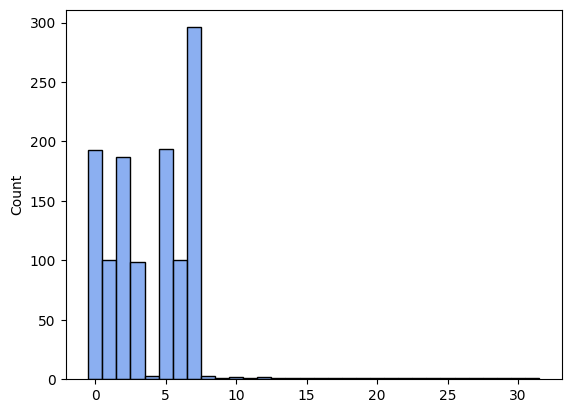

In [3]:
from sklearn import cluster
from seaborn import histplot

# perform clustering
clustering = cluster.AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single', distance_threshold=1.1, compute_full_tree=True).fit(df)

# plot cluster distribution
histplot(clustering.labels_, discrete=True, stat='count', color='cornflowerblue'); # semicolon removes jupyter output

In [4]:
# 32 groups total, could also use range(max(clustering.labels_))
print([sum(clustering.labels_ == i) for i in range(32)])

[193, 100, 187, 99, 3, 194, 100, 296, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Exercise 2 - K-Means Clustering (30 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (20 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

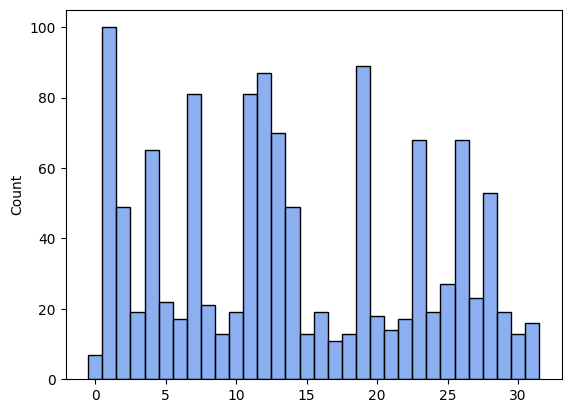

In [5]:
# perform clustering
clustering = cluster.KMeans(n_clusters=32).fit(df)

# plot cluster distribution
histplot(clustering.labels_, discrete=True, stat='count', color='cornflowerblue');

In [6]:
print([sum(clustering.labels_ == i) for i in range(32)])

[7, 100, 49, 19, 65, 22, 17, 81, 21, 13, 19, 81, 87, 70, 49, 13, 19, 11, 13, 89, 18, 14, 17, 68, 19, 27, 68, 23, 53, 19, 13, 16]


### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

Hierarchical Agglomerative clustering resulted in a few very large groups, 7 exactly with over 10% of the data each. Outside of that 7, the rest of the groups were very small, usually no more than 1 or 2 elements. On the other hand, K-Means clustering resulted in 12 groups holding around 5% of the data each, and no group holding more than 8% of the data. Also, the smaller groups still had around 20 elements each. So, it is fair to say that K-Means clustering resulted in a more even distribution of elements. 

This difference in spread can be attributed to the methods behind these two clustering algorithms. With Agglomerative clustering, we defined that distance will be computed using Manhattan distance, whereas K-Means uses euclidean. This means that K-Means will have float distance, which actually shouldn't be an issue if there is only 1 change. The euclidean distance of two bit strings with only 1 change is ultimately 1. So with equivalent strings euclidean and manhattan distance should be interchangeable. However, what likely had more effect was that with Agglomerative clustering we set a distance threshold of 1, so only equivalent strings would cluster. In K-Means, there is no distance threshold, it just minimizes distance over the provided number of groups. This means that K-Means clustering is returning clusters which are not strictly equivalence classes in our definition.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

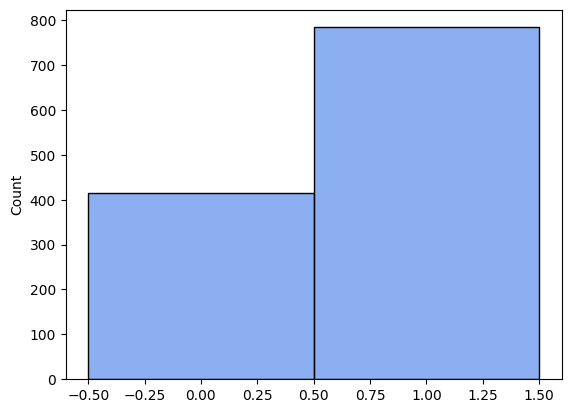

In [7]:
# perform clustering
clustering = cluster.KMeans(n_clusters=2).fit(df)

# plot cluster distribution
histplot(clustering.labels_, discrete=True, stat='count', color='cornflowerblue');

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

In [25]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from seaborn import scatterplot

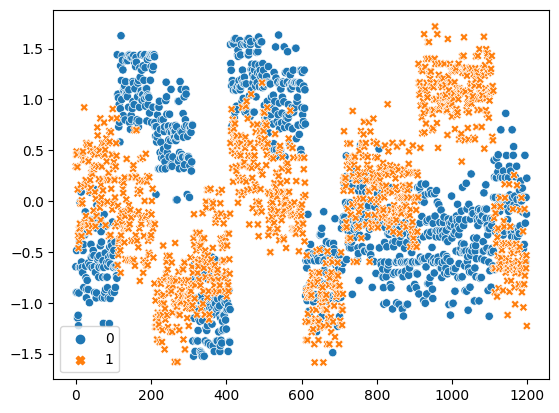

In [60]:

pca = PCA(n_components=2)
pca = pca.fit(df)
scatterplot(pca.transform(df));

In [65]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.321369,-0.306039,-0.102207,0.027061,-0.000468,-0.251047,-0.412779,-0.413701,0.345330,0.253049,-0.116780,-0.047012,-0.193419,-0.012871,-0.006527,0.388035
1,0.187755,0.230684,-0.123406,-0.453300,-0.220397,-0.123053,-0.030125,0.072670,-0.180215,-0.117987,-0.336985,0.463618,-0.244581,-0.229274,-0.362450,0.047563


Row 0 defines the weights of the 16 features in the first principal component. Row 1 does the same for the second principal component. We can see that the highest positive weight for principal component 1 is ...

In [73]:
print(f'{pca.components_[0].max():.6f} at bit {pca.components_[0].argmax()}')

0.388035 at bit 15


## Exercise 4 - Collaborative Statement (5 points) 
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I did not discuss code with, or recieve any other forms of help from any other students. The only online sources I used was the documentation for scikit-learn as well as seaborn.